<a href="https://colab.research.google.com/github/AdemHamroun/ML-project/blob/main/Income_prediction_machine_learning_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
df=pd.read_csv('adult.csv')
df


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [24]:
df.columns


Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [25]:
df=pd.concat([df.drop('workclass',axis=1),pd.get_dummies(df.workclass).add_prefix('workclass :')],axis=1)
df=pd.concat([df.drop('occupation',axis=1),pd.get_dummies(df.occupation).add_prefix('occupation :')],axis=1)
df=df.drop("education", axis=1)
df=pd.concat([df.drop('marital-status',axis=1),pd.get_dummies(df["marital-status"]).add_prefix('marital-status :')],axis=1)
df=pd.concat([df.drop('relationship',axis=1),pd.get_dummies(df.relationship).add_prefix('relationship :')],axis=1)
df=pd.concat([df.drop('race',axis=1),pd.get_dummies(df.race).add_prefix('race :')],axis=1)
df=pd.concat([df.drop('native-country',axis=1), pd.get_dummies(df["native-country"]).add_prefix('native-country :')],axis=1)
df


,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,workclass :?,workclass :Federal-gov,...,native-country :Portugal,native-country :Puerto-Rico,native-country :Scotland,native-country :South,native-country :Taiwan,native-country :Thailand,native-country :Trinadad&Tobago,native-country :United-States,native-country :Vietnam,native-country :Yugoslavia
0,25,226802,7,Male,0,0,40,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,Male,0,0,50,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,Male,0,0,40,>50K,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,Male,7688,0,40,>50K,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,Female,0,0,30,<=50K,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,Female,0,0,38,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
48838,40,154374,9,Male,0,0,40,>50K,0,0,...,0,0,0,0,0,0,0,1,0,0
48839,58,151910,9,Female,0,0,40,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
48840,22,201490,9,Male,0,0,20,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0


In [26]:
df.columns



Index(['age', 'fnlwgt', 'educational-num', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'income', 'workclass :?',
       'workclass :Federal-gov', 'workclass :Local-gov',
       'workclass :Never-worked', 'workclass :Private',
       'workclass :Self-emp-inc', 'workclass :Self-emp-not-inc',
       'workclass :State-gov', 'workclass :Without-pay', 'occupation :?',
       'occupation :Adm-clerical', 'occupation :Armed-Forces',
       'occupation :Craft-repair', 'occupation :Exec-managerial',
       'occupation :Farming-fishing', 'occupation :Handlers-cleaners',
       'occupation :Machine-op-inspct', 'occupation :Other-service',
       'occupation :Priv-house-serv', 'occupation :Prof-specialty',
       'occupation :Protective-serv', 'occupation :Sales',
       'occupation :Tech-support', 'occupation :Transport-moving',
       'marital-status :Divorced', 'marital-status :Married-AF-spouse',
       'marital-status :Married-civ-spouse',
       'marital-status :Married-

In [27]:
df['gender']=df['gender'].apply(lambda x : 1 if x=='Male' else 0)
df['income']=df['income'].apply(lambda x : 1 if x== '>50K' else 0)
df



,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,workclass :?,workclass :Federal-gov,...,native-country :Portugal,native-country :Puerto-Rico,native-country :Scotland,native-country :South,native-country :Taiwan,native-country :Thailand,native-country :Trinadad&Tobago,native-country :United-States,native-country :Vietnam,native-country :Yugoslavia
0,25,226802,7,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,1,0,0,50,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,1,0,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,1,7688,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,0,0,0,30,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,0,0,0,38,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48838,40,154374,9,1,0,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0
48839,58,151910,9,0,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48840,22,201490,9,1,0,0,20,0,0,0,...,0,0,0,0,0,0,0,1,0,0


<Axes: >

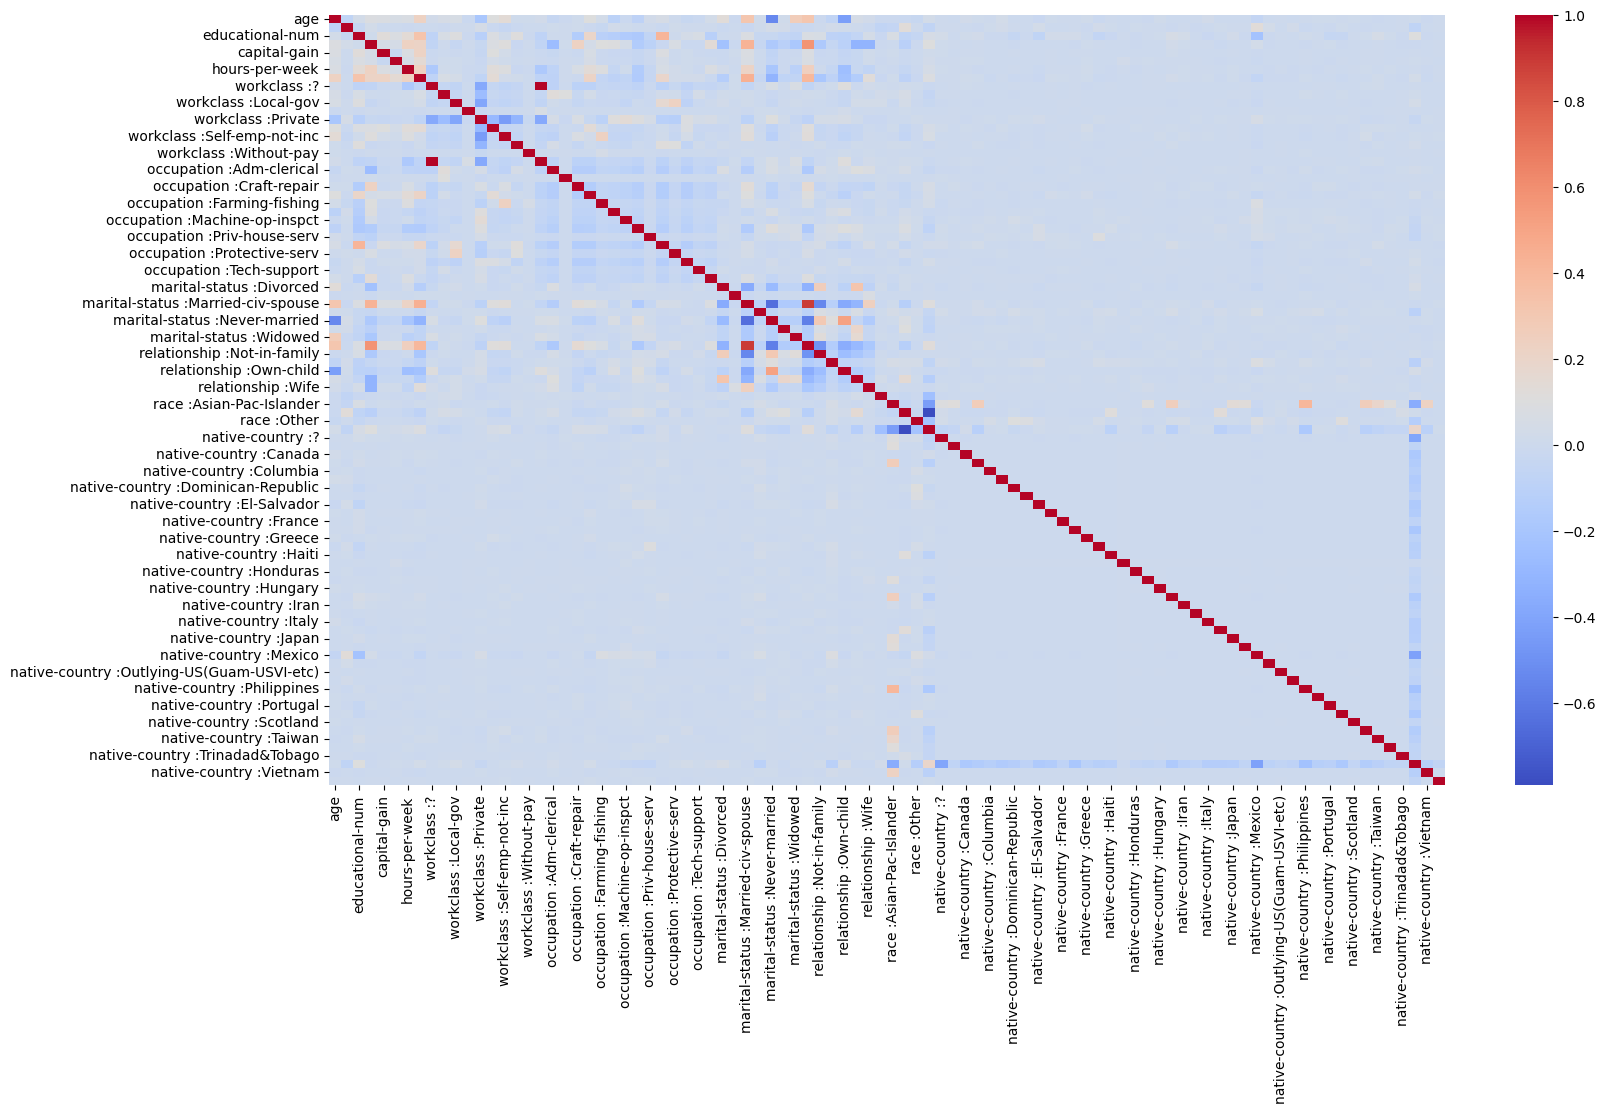

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(),annot=False,cmap="coolwarm")

In [34]:
correlations=df.corr()['income'].abs()
sorted_correlations = correlations.sort_values()
num_cols_to_drop=int(0.8*len(df.columns))
cols_to_drop=sorted_correlations.iloc[:num_cols_to_drop].index
df_dropped=df.drop(cols_to_drop,axis=1)

<Axes: >

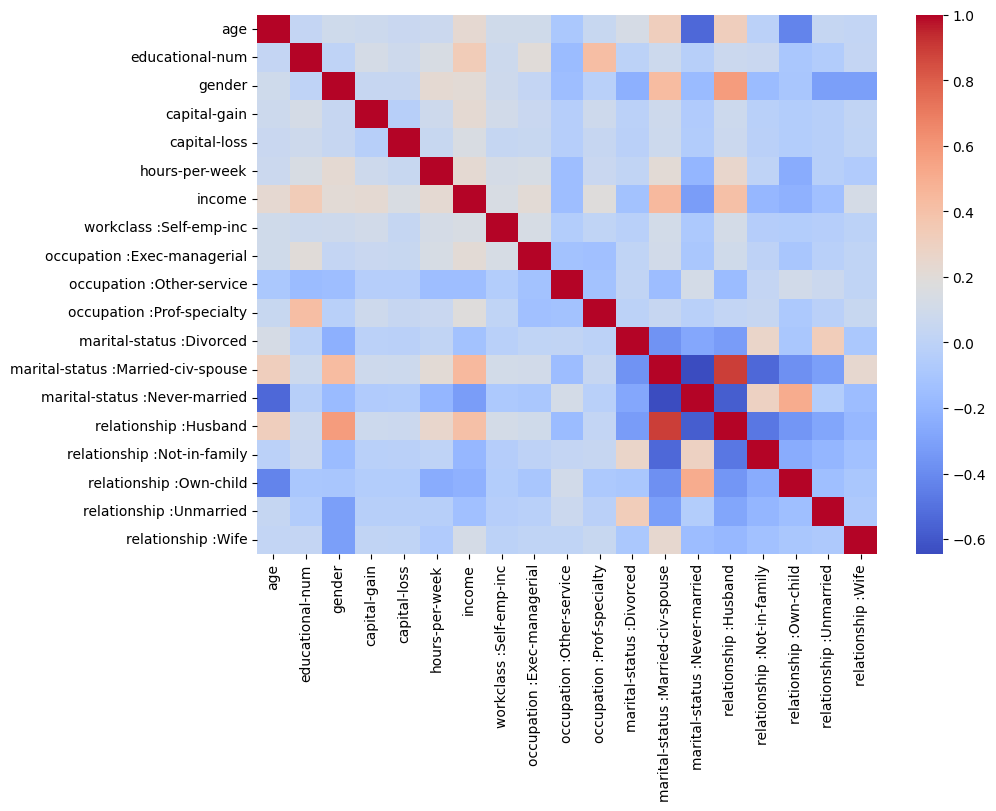

In [39]:
plt.figure(figsize=(10,7))
sns.heatmap(df_dropped.corr(),annot=False,cmap="coolwarm")

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
train_df , test_df =train_test_split(df,test_size=0.2)


In [43]:
train_x=train_df.drop('income',axis=1)
train_y=train_df['income']
test_x=test_df.drop('income',axis=1)
test_y=test_df['income']

In [44]:
rf=RandomForestClassifier()
rf.fit(train_x,train_y)


RandomForestClassifier()

In [49]:
rf.score(test_x,test_y)


0.8570989865902344

In [52]:
rf.feature_importances_

array([1.50883549e-01, 1.72283407e-01, 1.05764706e-01, 1.04902260e-02,
       9.83736858e-02, 3.41629365e-02, 8.53847778e-02, 1.71042377e-03,
       4.59062891e-03, 5.01103886e-03, 2.94191397e-06, 8.33617283e-03,
       5.90063017e-03, 7.16807230e-03, 3.79743137e-03, 1.05224305e-04,
       1.90006937e-03, 4.39114205e-03, 7.81423007e-05, 5.86525872e-03,
       2.08966156e-02, 4.11666149e-03, 3.27091055e-03, 3.82176734e-03,
       6.49850213e-03, 1.92289111e-04, 1.63865536e-02, 2.53867138e-03,
       5.75535499e-03, 3.70770788e-03, 3.92387556e-03, 7.16114338e-03,
       3.86252868e-04, 5.91804648e-02, 8.68792021e-04, 2.89028976e-02,
       1.60036265e-03, 1.71486615e-03, 4.26550642e-02, 1.34345717e-02,
       1.50000574e-03, 1.08315857e-02, 5.45448765e-03, 9.28187644e-03,
       1.11221791e-03, 2.69125785e-03, 4.33616523e-03, 8.29069435e-04,
       5.47750290e-03, 2.62925390e-03, 3.34501656e-04, 1.34344699e-03,
       4.70047393e-04, 2.79462358e-04, 6.92548795e-04, 2.38339234e-04,
      

In [56]:
importances=dict(zip(rf.feature_names_in_ ,rf.feature_importances_))
importances={k: V for k , V in sorted(importances.items(), key = lambda x : x[1] , reverse=True)}
importances

{'fnlwgt': 0.1722834071668916,
 'age': 0.15088354932761067,
 'educational-num': 0.10576470648754759,
 'capital-gain': 0.09837368584075501,
 'hours-per-week': 0.08538477779409964,
 'marital-status :Married-civ-spouse': 0.05918046482553494,
 'relationship :Husband': 0.04265506421994565,
 'capital-loss': 0.03416293647499217,
 'marital-status :Never-married': 0.028902897602510424,
 'occupation :Exec-managerial': 0.02089661557763594,
 'occupation :Prof-specialty': 0.01638655358965202,
 'relationship :Not-in-family': 0.013434571668203608,
 'relationship :Own-child': 0.010831585728897648,
 'gender': 0.010490225974605489,
 'relationship :Wife': 0.009281876435117329,
 'workclass :Private': 0.008336172828878255,
 'workclass :Self-emp-not-inc': 0.0071680722963157525,
 'marital-status :Divorced': 0.007161143382279676,
 'occupation :Other-service': 0.0064985021276800945,
 'workclass :Self-emp-inc': 0.0059006301709530395,
 'occupation :Craft-repair': 0.005865258723885154,
 'occupation :Sales': 0.005